In [1]:
import os
import sys
import json
import csv

# numeric, scientific
from scipy import linalg as spla
import numpy as np

# plotting
%matplotlib inline
import matplotlib
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.pyplot as plt

# import Kitaev Honeycomb package
import kithcmb
from kithcmb import DisorderVortexSectors as vs
from kithcmb import MomSpaceKitaev as momvs

# import jsci, CT's enhanced json stream write package
import jsci
from jsci import WriteStream as jsciwrite
from jsci import Coding as jscicoding

In [30]:
def get_spatial_matrix_elements(eigenvectors_,band_index_,site1_,site2_):
    try:
        return ( eigenvectors_[(site2_)][state_]*np.conjugate(eigenvectors_[(site2_)][state_]) + eigenvectors_[site1_][state_]*np.conjugate(eigenvectors_[site1_][state_]) )
    except IndexError:
        print "attempted to access index ",site_," and ",(site_+1)
        raise
    
def draw_spatial_eigenstate(eigenvectors_,state_):
    spatial_eigenstate = [ [ get_spatial_matrix_elements(full_eigeninfo,state_, ((2*x + 2*L - y)%(2*L) + y*2*L)%(2*L**2) ) for x in range(0,2*L,2) ] for y in range(L) ]
    draw_real_imag_matrix(spatial_eigenstate)
    
def draw_spatial_eigenstate_3d(kh_sys_,band_index_,px_index_,color_='b'):
    
    # get the eigenvectors
    eigenvectors = kh_sys_.get_eigenvectors( px_index_ )
    
    # X-Y arrays, the dimension we can draw in X is the x-dim of the unit cell multiplied
    # by the number of momentum points included.
    X = [ range(kh_sys_.Lx*len(kh_sys_.px)) for i in range(kh_sys_.Ly) ]
    Y = [ range(kh_sys_.Ly) for i in range(kh_sys_.Lx*len(kh_sys_.px)) ]
    Y = np.array(Y).transpose()
    
    # construct the real space eigenvector
    spatial_eigenstate = [ [ 0. for x in range(kh_sys_.Lx*len(kh_sys_.px)) ] for y in range(kh_sys_.Ly) ]
    for y in range(kh_sys_.Ly):
        
        # iterate over the number of x-unit cells we have allowed based on the spacing we set for px
        for px in range(len(kh_sys_.px)):
            # iterate inside the x-unit cell
            for unit_x in range(kh_sys_.Lx):                
                # get the site indexes of the sites we want, using the y-link
                s1,s2 = kh_sys_._convert_link_to_spin_pair( 2,unit_x+1,y+1 )
                # get the probability amplitude
                prob_amp = ( eigenvectors[s1-1][band_index_]*np.conjugate(eigenvectors[s1-1][band_index_]) + eigenvectors[s2-1][band_index_]*np.conjugate(eigenvectors[s2-1][band_index_]) )
                
                # multiply the prob amp by the cosine wave in the periodic direction
                # prob_amp *= np.cos( px * kh_sys_.px[px_index_] )**2
                spatial_eigenstate[ y ][ unit_x + kh_sys_.Lx*px ] = prob_amp
    
    # fig = plt.figure( figsize=(16,10))
    # ax = fig.add_subplot(111, projection='3d')
    ax.plot_wireframe(X, Y, np.real(spatial_eigenstate).tolist(), color=color_, rstride=5, cstride=10)
    # ax.plot_wireframe(X, Y, [ [ 0. for x in range(kh_sys_.Lx*len(kh_sys_.px)) ] for y in range(kh_sys_.Ly) ], color='k', rstride=10, cstride=10)
    # ax.plot_wireframe(X, Y, TEST, rstride=1, cstride=1)
    # ax.view_init(elev=30., azim=30.)
    
    # plt.xlabel('x')
    # plt.ylabel('y')
    # plt.show()

In [3]:
kh_sys = momvs.MomSpaceKitaev(1.,0.1)

In [4]:
kh_sys.set_no_vortex_cylinder(50)

In [5]:
# full vortex
# spectrum = kh_sys.get_spectrum( np.linspace(-np.pi/2,3*np.pi/2,21) )

# no vortex
l_px = 100
spectrum = kh_sys.get_spectrum( (2.*np.pi/l_px)*np.array(range(l_px)) )

/Users/cns08/Projects/code/kithcmb/packages/kithcmb/MomSpaceKitaev.py:55: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if np.all(self.px == px_range_) and np.all(self.py == py_range_):


In [6]:
bands = [ [ kh_sys.spectrum[px][0][band] for px in range(len(kh_sys.px)) ] for band in range(2*kh_sys.Lx*kh_sys.Ly) ]

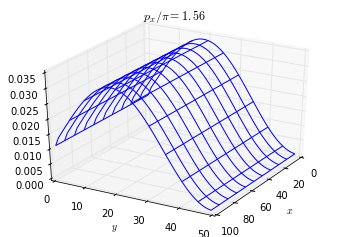

In [32]:
_px = 78
fig = plt.figure( figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')

draw_spatial_eigenstate_3d( kh_sys, 50, _px )

ax.view_init(elev=30., azim=30.)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title( r'$p_x/\pi = '+str(kh_sys.px[_px]/np.pi)+'$' )

plt.savefig('higher_mom_edge_band_mode.pdf')
plt.show()

In [8]:
kh_sys.px

array([ 0.        ,  0.06283185,  0.12566371,  0.18849556,  0.25132741,
        0.31415927,  0.37699112,  0.43982297,  0.50265482,  0.56548668,
        0.62831853,  0.69115038,  0.75398224,  0.81681409,  0.87964594,
        0.9424778 ,  1.00530965,  1.0681415 ,  1.13097336,  1.19380521,
        1.25663706,  1.31946891,  1.38230077,  1.44513262,  1.50796447,
        1.57079633,  1.63362818,  1.69646003,  1.75929189,  1.82212374,
        1.88495559,  1.94778745,  2.0106193 ,  2.07345115,  2.136283  ,
        2.19911486,  2.26194671,  2.32477856,  2.38761042,  2.45044227,
        2.51327412,  2.57610598,  2.63893783,  2.70176968,  2.76460154,
        2.82743339,  2.89026524,  2.95309709,  3.01592895,  3.0787608 ,
        3.14159265,  3.20442451,  3.26725636,  3.33008821,  3.39292007,
        3.45575192,  3.51858377,  3.58141563,  3.64424748,  3.70707933,
        3.76991118,  3.83274304,  3.89557489,  3.95840674,  4.0212386 ,
        4.08407045,  4.1469023 ,  4.20973416,  4.27256601,  4.33

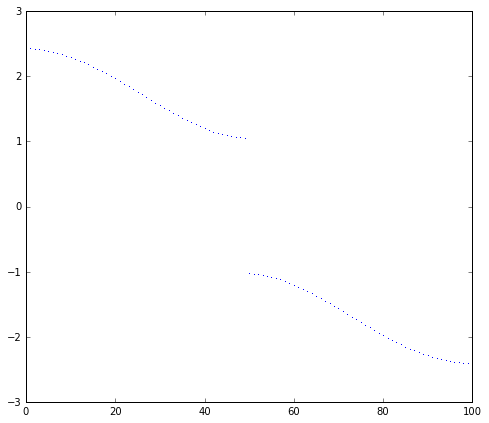

In [9]:
_px = 25
band_at_px = [ kh_sys.spectrum[_px][0][band] for band in range(2*kh_sys.Lx*kh_sys.Ly) ]

fig, ax = plt.subplots( figsize=(8,7) )
plt.plot( band_at_px, ',' )

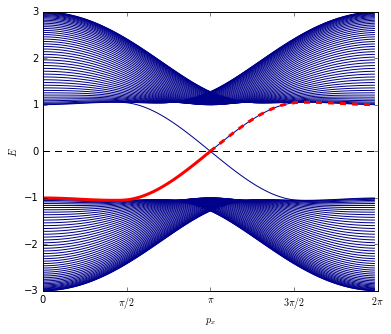

In [10]:
fig, ax = plt.subplots( figsize=(6,5) )

# plt.figure( figsize=(10,8) )
for band in bands:
    plt.plot( kh_sys.px, band, color='darkblue')
    plt.plot( kh_sys.px, [ 0. for px in kh_sys.px ], 'k--')
    
plt.plot( kh_sys.px[:int(len(kh_sys.px)/2)+1], bands[kh_sys.Ly][:int(len(kh_sys.px)/2)+1], 'r', linewidth=3 )
plt.plot( kh_sys.px[int(len(kh_sys.px)/2):], bands[kh_sys.Ly-1][int(len(kh_sys.px)/2):], 'r--', linewidth=3 )
    
# FV
# plt.xlim(-np.pi/2,3*np.pi/2)
# ax.set_xticks([-np.pi/2,0,np.pi/2,np.pi,3*np.pi/2])
# ax.set_xticklabels([r'$-\pi/2$','0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
# NV
plt.xlim(0,2*np.pi)
ax.set_xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi])
ax.set_xticklabels(['0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])

plt.xlabel(r'$p_x$')
plt.ylabel(r'$E$')

plt.savefig('NV_cylinder_spectrum.pdf')
plt.show()

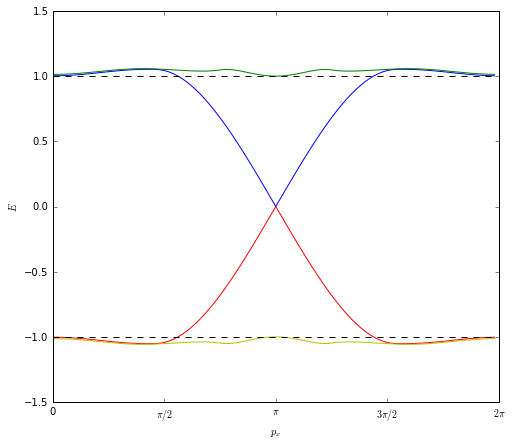

In [11]:
fig, ax = plt.subplots( figsize=(8,7) )

plt.plot( kh_sys.px, bands[kh_sys.Lx*kh_sys.Ly], color='r')
plt.plot( kh_sys.px, bands[kh_sys.Lx*kh_sys.Ly-1], color='b')
plt.plot( kh_sys.px, bands[kh_sys.Lx*kh_sys.Ly-2], color='g')
plt.plot( kh_sys.px, bands[kh_sys.Lx*kh_sys.Ly+1], color='y')

plt.plot( kh_sys.px, [ min(bands[kh_sys.Lx*kh_sys.Ly-2]) for px in kh_sys.px ] , 'k--')
plt.plot( kh_sys.px, [ max(bands[kh_sys.Lx*kh_sys.Ly+1]) for px in kh_sys.px ] , 'k--')

# FV
# plt.xlim(-np.pi/2,3*np.pi/2)
# ax.set_xticks([-np.pi/2,0,np.pi/2,np.pi,3*np.pi/2])
# ax.set_xticklabels([r'$-\pi/2$','0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
# NV
plt.xlim(0,2*np.pi)
ax.set_xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi])
ax.set_xticklabels(['0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])

plt.xlabel(r'$p_x$')
plt.ylabel(r'$E$')

plt.show()

In [12]:
eigenvectors = kh_sys.get_eigenvectors( np.pi )

In [13]:
eigenvectors

array([[ 0.00568777 +0.00000000e+00j, -0.01136950 -0.00000000e+00j,
        -0.01703917 -0.00000000e+00j, ...,  0.01768549 +0.00000000e+00j,
        -0.01180552 -0.00000000e+00j, -0.00590731 -0.00000000e+00j],
       [-0.00080918 +8.56021193e-03j,  0.00161520 -1.70870670e-02j,
         0.00241493 -2.55473397e-02j, ...,  0.00247649 -2.61984992e-02j,
        -0.00165628 +1.75216369e-02j, -0.00082973 +8.77763582e-03j],
       [ 0.01431326 +1.35300125e-03j, -0.02848059 -2.69220844e-03j,
        -0.04235734 -4.00394760e-03j, ...,  0.04296598 +4.06148084e-03j,
        -0.02890516 -2.73234244e-03j, -0.01453125 -1.37360715e-03j],
       ..., 
       [ 0.01453125 -1.37360715e-03j,  0.02890516 -2.73234244e-03j,
        -0.04296598 +4.06148084e-03j, ..., -0.04235734 +4.00394760e-03j,
        -0.02848059 +2.69220844e-03j,  0.01431326 -1.35300125e-03j],
       [-0.00082973 -8.77763582e-03j, -0.00165628 -1.75216369e-02j,
         0.00247649 +2.61984992e-02j, ..., -0.00241493 -2.55473397e-02j,
      